**Name: Josh Virene** 

**NR427: Programming for GIS II**

**Date: 4.28.2023**  

_Short Project Purpose:_ The purpose of this project is to build upon the skills learned in NR426, as well as those learned in modules 1-3

- This project will explore the functionality of the pandas and matplotlib.pyplot modules for csv file
- This project will analyze well depth, water depth, and elevation data across Colorado
- This project also incorporates functions from the os module and filter data based on datetime64[ns]  

Because this dataset has spatial data (coordinates), the final project will incorporate spatial analysis of the data using open source python libraries such as geopandas and rasterio.

_Final Project Purpose:_ The purpose of this project is to extend the analysis conducted in the short project. In the final modules of the course, we learned how to use open-source libraries which allow for spatial analysis without relying on ArcGIS.

For the analysis portion of the final project, the following tasks will be achieved in the script: 
- Give a generic map of wells across the state of Colorado, plotting all wells from the dataset
- Creating a map with wells that are colorized by the aquifer that they are tied to 
- Exploring the spatial distribution of wells in the state based on their well depth, water level, and elevation
- Determining where outliers in the spatial distribution of wells based on hypotheses developed in the analysis, then mapping these outliers

In [1]:
## Short Project
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import sys
## Final Project
import geopandas as gpd
import rasterio
from shapely.geometry import Point, Polygon
import numpy as np
from numpy import nan
import json

print("Successfully imported all modules")

Successfully imported all modules


**Step One, Importing the Data: The data to analyze is Colorado Well Depths and Elevations**


In [2]:
# CSV link address: https://data.colorado.gov/api/views/jh9r-rskp/rows.csv?accessType=DOWNLOAD&bom=true&format=true
print("Insert the link to the file")
url = input(r"")
response = requests.get(url)

Insert the link to the file
https://data.colorado.gov/api/views/jh9r-rskp/rows.csv?accessType=DOWNLOAD&bom=true&format=true


In [3]:
# A check to ensure that the file is of the correct type for this script (A CSV file)
csv_check = url.__contains__("csv")
CSV_check = url.__contains__("CSV")

if csv_check == True:
    print("This file is the correct type, it is a .csv file\n")
elif CSV_check == True:
    print("This file is the correct type, it is a .CSV file\n")
else:
    print("This file is not a CSV file, make sure that the link is correct\n")
    sys.exit()

This file is the correct type, it is a .csv file



In [4]:
try:
    outfile = r"WellDepths_Elevations.csv"
    open(outfile, "wb").write(response.content)
    print(f"Saved the file from the url: {url}\n")
except Exception as e:
    print (str(e))

Saved the file from the url: https://data.colorado.gov/api/views/jh9r-rskp/rows.csv?accessType=DOWNLOAD&bom=true&format=true



In [5]:
# Saving the file, and making sure that it exists:
outfile = r"WellDepths_Elevations.csv"
filepath = r"/Users/joshvirene/Desktop/Desktop/NR427FinalProj"
filename = outfile
path = os.path.join(filepath,filename)

if os.path.exists(path):
    print(f'The file is saved to the location: {filepath}, and the name of the file is {filename}\n')
else:
    print("The file was not successfully saved, analysis will not run")

The file is saved to the location: /Users/joshvirene/Desktop/Desktop/NR427FinalProj, and the name of the file is WellDepths_Elevations.csv



In [6]:
print("Starting Data Analysis.....\n\n")
# Step One: Get field names:
data = pd.read_csv(path, low_memory=False)
print("The complete list of field names for this dataset are:\n")
print(data.info())
print("")
print(f'The first few rows of this dataset are: {data.head()}\n')

Starting Data Analysis.....


The complete list of field names for this dataset are:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22923 entries, 0 to 22922
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Well Name                 22921 non-null  object 
 1   Receipt                   1660 non-null   object 
 2   Permit                    1949 non-null   object 
 3   Owner                     1676 non-null   object 
 4   Well Depth                21007 non-null  float64
 5   Measurement Date          22923 non-null  object 
 6   Water Level Depth         22540 non-null  float64
 7   Designated Basin          5851 non-null   object 
 8   Water Level Elevation     22268 non-null  float64
 9   Measurement By            22923 non-null  object 
 10  Elevation                 22887 non-null  float64
 11  Elevation Accuracy        19417 non-null  object 
 12  Top Perforated Casing     1425

In [7]:
# Beyond this point, the script will require adaptation if the url is different than the one I used
if url != "https://data.colorado.gov/api/views/jh9r-rskp/rows.csv?accessType=DOWNLOAD&bom=true&format=true":
    print("Warning, this script was written for the groundwater dataset described in the pseudocode above")
    print("Adapt this script according to the fields in your dataset to generate summary stats and figures")
else:
    print("")

**Step Two: Clean the data by filtering outliers**

In [8]:
# in the initial analysis, the summary statistics printed indicate outliers outside of what would be expected for Well Depth, Water Depth, and Elevation
# This code removes these outliers:
q_low = data["Elevation"].quantile(0.01)
q_hi = data["Elevation"].quantile(0.99)
data = data[(data["Elevation"] < q_hi) & (data["Elevation"] > q_low)]

q_low = data['Well Depth'].quantile(0.01)
q_hi = data['Well Depth'].quantile(0.99)
data = data[(data['Well Depth'] < q_hi) & (data['Well Depth'] > q_low)]

q_low = data['Water Level Depth'].quantile(0.01)
q_hi = data['Water Level Depth'].quantile(0.99)
data = data[(data['Water Level Depth'] < q_hi) & (data['Water Level Depth'] > q_low)]
print("Successfully removed outliers from the dataset")

Successfully removed outliers from the dataset


**Step Three: Analysis of the entire dataset**

In [9]:
# Step Three (a): Getting summary statistics:
print("Generating summary statistics for the entire dataset:\n")
well_depth_stats = data['Well Depth'].describe()
print(f'Well Depth statistics:\n{well_depth_stats}\n')
water_depth_stats = data['Water Level Depth'].describe()
print(f'Water Depth statistics:\n{water_depth_stats}\n')
elevation_stats = data['Elevation'].describe()
print(f'Elevation statistics:\n{elevation_stats}\n')


Generating summary statistics for the entire dataset:

Well Depth statistics:
count    19259.000000
mean       168.869983
std        215.022865
min         10.000000
25%         38.000000
50%         77.000000
75%        250.000000
max       1748.000000
Name: Well Depth, dtype: float64

Water Depth statistics:
count    19259.000000
mean        67.168726
std         78.262757
min          0.100000
25%         13.400000
50%         30.000000
75%        100.850000
max        449.800000
Name: Water Level Depth, dtype: float64

Elevation statistics:
count    19259.000000
mean      5136.942610
std       1202.663609
min       3483.510000
25%       4191.840000
50%       4913.750000
75%       5634.775000
max       9127.560000
Name: Elevation, dtype: float64



Text(0.5, 0, 'Elevation (feet)')

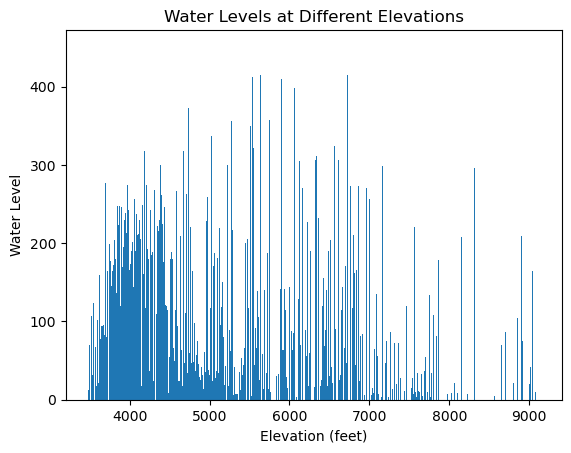

In [10]:
# Step Three (b): Plotting the data
# Looking at water levels across elevations
elevation_all = data['Elevation']
water_depth_all = data['Water Level Depth']
plt.bar(elevation_all,water_depth_all)
plt.title("Water Levels at Different Elevations")
plt.ylabel("Water Level")
plt.xlabel("Elevation (feet)")
#plt.show() # these are commented out to avoid causing the program to crash due to generating too many plots
#plt.savefig('Elevation_WL_all.png') # uncomment any plt.savefig() lines to save the plots to the folder

All figures generated for the entire dataset, now conducting the analysis for a single year..... 



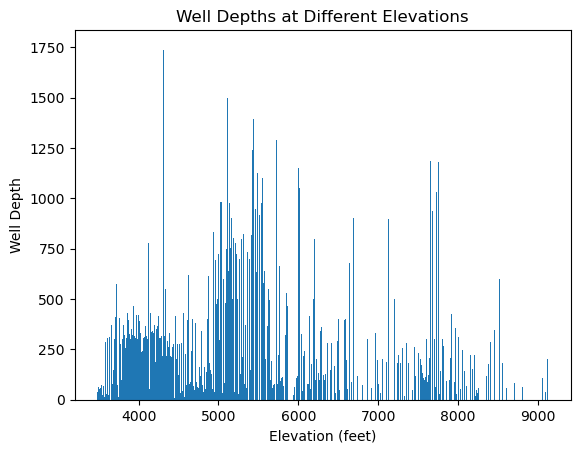

In [11]:
# Looking at well depths across elevations
elevation_all = data['Elevation']
well_depth_all = data['Well Depth']
plt.bar(elevation_all,well_depth_all)
plt.title("Well Depths at Different Elevations")
plt.ylabel("Well Depth")
plt.xlabel("Elevation (feet)")
#plt.show()
#plt.savefig('Elevation_WD_all.png')

print("All figures generated for the entire dataset, now conducting the analysis for a single year..... \n")

**Step Four: conducting the analysis for a given year, 2014:**

In [12]:
# Format the data using the datetime module in order to create subsets by year
data['Measurement Date'] = data['Measurement Date'].astype('datetime64[ns]')
# can now create new datasets for each desired year
data_2014 = data[data['Measurement Date'].dt.strftime('%Y') == '2014']

# Step Four (a): Getting the summary statistics for 2014:
well_depth_stats_2014 = data_2014['Well Depth'].describe()
print(f'2014 Well Depth statistics:\n{well_depth_stats}\n')
water_depth_stats_2014 = data_2014['Water Level Depth'].describe()
print(f'2014 Water Depth statistics:\n{water_depth_stats}\n')
elevation_stats_2014 = data_2014['Elevation'].describe()
print(f'2014 Elevation statistics:\n{elevation_stats}\n')

# Writing summary statistics to a file:
with open('Summary_Statistics.txt', 'w') as dataset:
    dataset.write("Statistics for the entire dataset:\n")
    dataset.write(f'Well Depth statistics:\n{well_depth_stats}\n')
    dataset.write(f'Water Depth statistics:\n{water_depth_stats}\n')
    dataset.write(f'Elevation statistics:\n{elevation_stats}\n')
    dataset.write("\nStatistics for the year 2014:\n")
    dataset.write(f'2014 Well Depth statistics:\n{well_depth_stats_2014}\n')
    dataset.write(f'2014 Water Depth statistics:\n{water_depth_stats_2014}\n')
    dataset.write(f'2014 Elevation statistics:\n{elevation_stats_2014}\n')

2014 Well Depth statistics:
count    19259.000000
mean       168.869983
std        215.022865
min         10.000000
25%         38.000000
50%         77.000000
75%        250.000000
max       1748.000000
Name: Well Depth, dtype: float64

2014 Water Depth statistics:
count    19259.000000
mean        67.168726
std         78.262757
min          0.100000
25%         13.400000
50%         30.000000
75%        100.850000
max        449.800000
Name: Water Level Depth, dtype: float64

2014 Elevation statistics:
count    19259.000000
mean      5136.942610
std       1202.663609
min       3483.510000
25%       4191.840000
50%       4913.750000
75%       5634.775000
max       9127.560000
Name: Elevation, dtype: float64



Text(0.5, 0, 'Elevation (feet)')

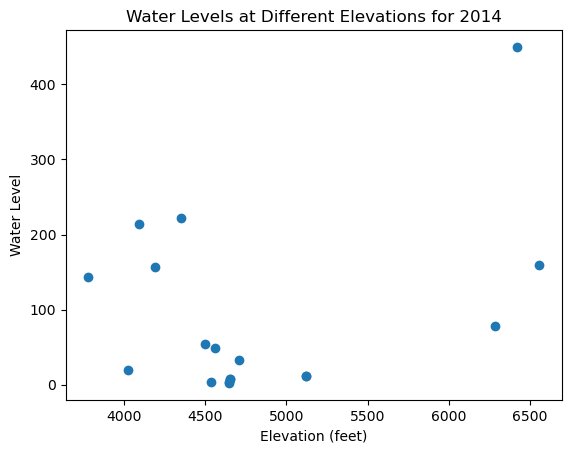

In [13]:
# Step Four (b): Plotting the data
# Water Levels
elevation_2014 = data_2014['Elevation']
water_depth_2014 = data_2014['Water Level Depth']
plt.scatter(elevation_2014,water_depth_2014)
plt.title("Water Levels at Different Elevations for 2014")
plt.ylabel("Water Level")
plt.xlabel("Elevation (feet)")
#plt.show()
#plt.savefig('Elevation_WL_2014.png')

Plots successfully generated and saved to the directory: /Users/joshvirene/Desktop/Desktop/NR427FinalProj
Summary statistics generated and saved to the directory: /Users/joshvirene/Desktop/Desktop/NR427FinalProj, the file name is: Summary_Statistics.txt


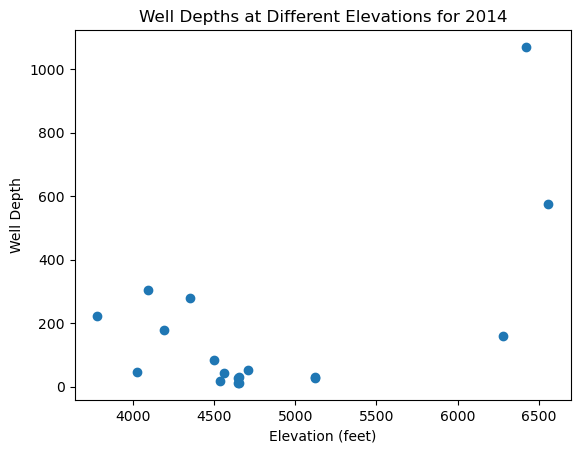

In [14]:
# Well Depths
elevation_2014 = data_2014['Elevation']
well_depth_2014 = data_2014['Well Depth']
plt.scatter(elevation_2014,well_depth_2014)
plt.title("Well Depths at Different Elevations for 2014")
plt.ylabel("Well Depth")
plt.xlabel("Elevation (feet)")
#plt.show()
#plt.savefig('Elevation_WD_2014.png')
print(f"Plots successfully generated and saved to the directory: {filepath}")
print(f"Summary statistics generated and saved to the directory: {filepath}, the file name is: {dataset.name}")

<br>
<br>
<br>
<br>

**This is the beginning of the analysis for the final project...**

<br>
<br>
<br>
<br>

**Step One: Clean the dataset so that it can be processed in geopandas:**

In [15]:
# The first step is to clean the data; latitude and longitude are given as a string with both elements contained in parentheses
# in order for geopandas to read these coordinates as point data, they need to be given as integers, and seperated
# into latitude and longitude columns
mycols = data['Location'].str.strip('()').str.split(', ',expand=True).rename(columns={0:'Latitude', 1:'Longitude'})
Longitude = mycols['Longitude'].astype(float)
Latitude = mycols['Latitude'].astype(float)
data['Latitude'] = Latitude
data['Longitude'] = Longitude


Successfully imported the boundary for the state of Colorado


<AxesSubplot:>

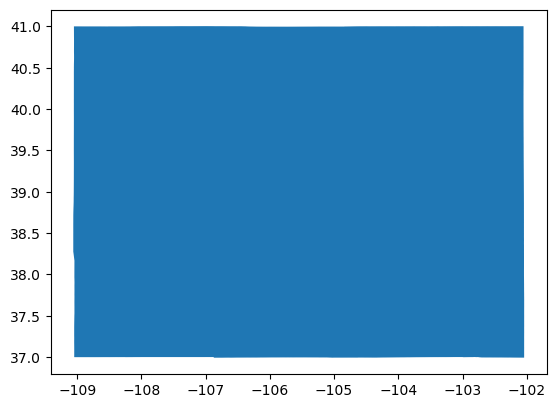

In [16]:
# Other data needed: A shapefile to delineate the boundary of Colorado:
co_boundary = gpd.read_file("Colorado_State_Boundary.shp")
type(co_boundary)
co_boundary = co_boundary.to_crs(crs='EPSG:4326')
print("Successfully imported the boundary for the state of Colorado")
co_boundary.plot()

In [17]:
# Getting the point data from this dataset
geometry = gpd.points_from_xy(x=data['Longitude'], y=data['Latitude'], crs="EPSG:4326")
gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(x=data['Longitude'], y=data['Latitude']))

**Step Two: Creating a plot to show a map of all wells in Colorado documented in this dataset**

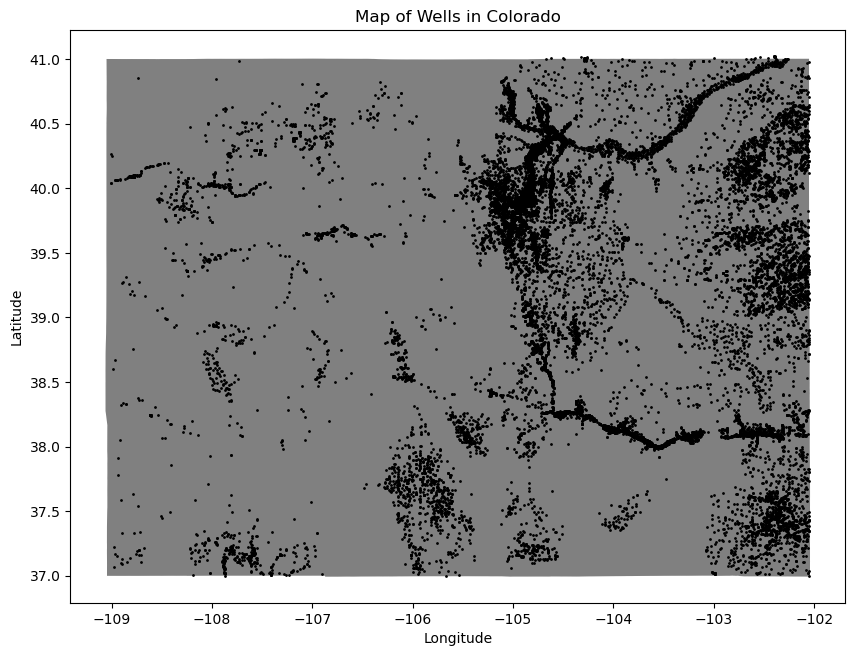

In [18]:
# Creating the first plot; a plot of all wells in Colorado that are contained in this dataset
fig, ax = plt.subplots(figsize=(10,10))
co_boundary.plot(ax=ax,color='grey')
plt.plot(gdf['Longitude'], gdf['Latitude'],'o', ms=1, color='black')
plt.title("Map of Wells in Colorado")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
#plt.savefig('Map_Wells_CO.png')

In [19]:
# Another interesting study question this dataset can answer is to look at all of the aquifers across the state
# of Colorado, this code brings a list of all aquifers. 
all_aquifers = []
all_aquifers_df = data['Aquifers'].unique()
for aquifer in all_aquifers_df:
    all_aquifers.append(aquifer)

print("Here is a list of all aquifers in the dataset:")
for aquifer in all_aquifers:
    print(aquifer)


Here is a list of all aquifers in the dataset:
OGALLALA
DENVER
ALLUVIAL
nan
OGALLALA, DAKOTA SANDSTONE
DAKOTA SANDSTONE, CHEYENNE SANDSTONE
UPPER DAWSON
LOWER DAWSON
FRUITLAND-PICTURED CLIFFS
DAKOTA SANDSTONE
UINTA
DAWSON
LARAMIE-FOX HILLS
GREEN RIVER
MESA VERDE
COALMONT
DAWSON, UPPER DAWSON, LOWER DAWSON
WASATCH-FORT UNION
CHEYENNE SANDSTONE
DENVER, ARAPAHOE
ARAPAHOE
DOCKUM
UPPER DAWSON, LOWER DAWSON
LOWER DAWSON, UPPER DAWSON
DAKOTA SANDSTONE, ALL UNNAMED AQUIFERS
ARAPAHOE, UPPER ARAPAHOE, LOWER ARAPAHOE
OGALLALA, DOCKUM
OGALLALA, CHEYENNE SANDSTONE
ARAPAHOE, UPPER ARAPAHOE
DENVER, DAWSON
ALLUVIAL, DOCKUM
DENVER, UPPER ARAPAHOE
POISON CANYON
DAKOTA SANDSTONE, DAKOTA-BURRO CANYON
UINTA, GREEN RIVER
LOWER ARAPAHOE
WHITE RIVER
LOWER ARAPAHOE, LARAMIE-FOX HILLS
UPPER ARAPAHOE
OGALLALA, PURGATOIRE
DAWSON, LOWER DAWSON
DAKOTA SANDSTONE, DOCKUM
ARAPAHOE, LOWER ARAPAHOE
UPPER ARAPAHOE, LOWER ARAPAHOE
DAKOTA-BURRO CANYON
ALL UNNAMED AQUIFERS
ALLUVIAL, ALL UNNAMED AQUIFERS
VALLEY-FILL DEPOSITS

In [46]:
# We want to lump some of the aquifer subsets into their broader / more general aquifer to reduce the number of 
# categories that are displayed on the legend. The following code creates a new geodataframe to do this:

gdf_2 = gpd.GeoDataFrame(gdf, geometry=geometry)
category_dict = {
    'ALLUVIAL, ALL UNNAMED AQUIFERS' : 'ALLUVIAL',
    'ALLUVIAL, DOCKUM': 'ALLUVIAL',
    'ARAPAHOE, LOWER ARAPAHOE': 'ARAPAHOE',
    'ARAPAHOE, UPPER ARAPAHOE' : 'ARAPAHOE',
    'LOWER ARAPAHOE' : 'ARAPAHOE',
    'LOWER ARAPAHOE, LARAMIE-FOX HILLS' : 'ARAPAHOE',
    'ARAPAHOE, UPPER ARAPAHOE, LOWER ARAPAHOE' : 'ARAPAHOE',
    'UPPER ARAPAHOE' : 'ARAPAHOE',
    'UPPER ARAPAHOE, LOWER ARAPAHOE' : 'ARAPAHOE',
    'DAKOTA SANDSTONE, ALL UNNAMED AQUIFERS':'DAKOTA SANDSTONE',
    'DAKOTA SANDSTONE, CHEYENNE SANDSTONE': 'DAKOTA SANDSTONE',
    'DAKOTA SANDSTONE, DAKOTA-BURRO CANYON':'',
    'DAKOTA SANDSTONE, DOCKUM':'DAKOTA SANDSTONE',
    'DAWSON, LOWER DAWSON' : 'DAWSON',
    'LOWER DAWSON' : 'DAWSON',
    'LOWER DAWSON, UPPER DAWSON' : 'DAWSON',
    'DAWSON, UPPER DAWSON, LOWER DAWSON' : 'DAWSON',
    'UPPER DAWSON' : 'DAWSON',
    'UPPER DAWSON, LOWER DAWSON' : 'DAWSON',
    'DENVER, ARAPAHOE' : 'DENVER',
    'DENVER, DAWSON' : 'DENVER',
    'DENVER, UPPER ARAPAHOE': 'DENVER',
    'UINTA, GREEN RIVER':'UNITA',
    'OGALLALA, DAKOTA SANDSTONE': 'OGALLALA',
    'OGALLALA, CHEYENNE SANDSTONE': 'OGALLALA',
    'OGALLALA, PURGATOIRE': 'OGALLALA',
    'OGALLALA, DOCKUM': 'OGALLALA',
    
}
gdf_2['Aquifers'] = gdf_2['Aquifers'].replace(category_dict)


**Step Three: Creating a map of all wells in the dataset, grouped by the aquifer they are associated with**

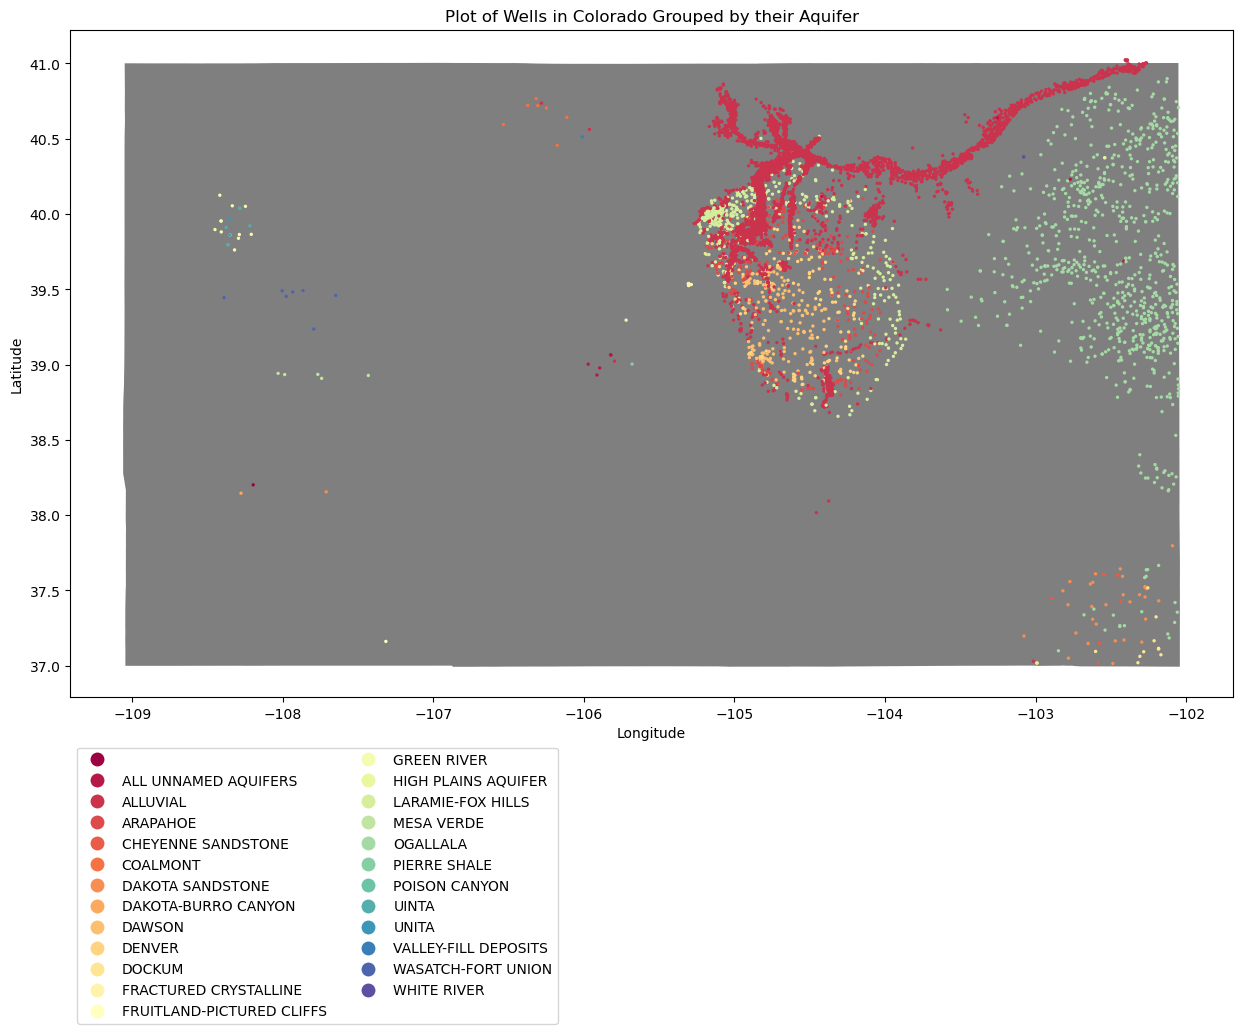

In [52]:
geometry = [Point(xy) for xy in zip(gdf['Longitude'], gdf['Latitude'])]
# create a geodataframe from the pandas dataframe and the Point objects
gdf_1 = gpd.GeoDataFrame(gdf, geometry=geometry)
# plot the geodataframe with different colors for each aquifer
legend_kwds = {'loc': 'lower left', 'bbox_to_anchor': (0.0, -0.5), 'ncol': 2}
fig, ax = plt.subplots(figsize=(15,15))
co_boundary.plot(color='black',
                 figsize=(15,15),
                 alpha=0.5,
                 ax=ax)
gdf_2.plot(column='Aquifers',
           figsize = (15,15),
           legend_kwds=legend_kwds,
           cmap='Spectral',
           markersize=2,
           legend=True,
          ax=ax)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Plot of Wells in Colorado Grouped by their Aquifer")
plt.show()
#plt.savefig('Aquifer_grouped_wells.png')

**Step Four: Exploring the spatial distribution of aquifers across the state**

Using the summary statistics textfile that was generated in the short project analysis, the subsequent plots generate figures based percentiles for elevation, well depth, and water depth to gain a deeper understanding of the well dataset by visualizing these. 

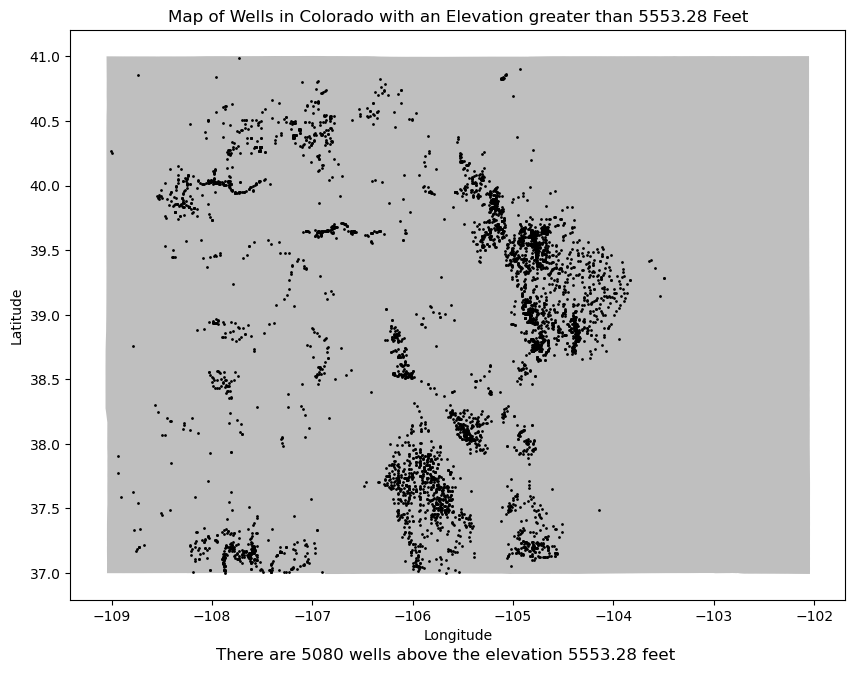

In [21]:
# Mapping wells above the 75% percentile for elevation:
gdf1 = gdf[gdf['Elevation']>5553.28]
num_wells = len(gdf1)
txt= (f'There are {num_wells} wells above the elevation 5553.28 feet')

fig, ax = plt.subplots(figsize=(10,10))
co_boundary.plot(ax=ax,color='grey', alpha = 0.5)
plt.plot(gdf1['Longitude'], gdf1['Latitude'],'o', ms=1, color='black')
plt.title(f"Map of Wells in Colorado with an Elevation greater than 5553.28 Feet")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.figtext(0.5, 0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)
# plt.show()
plt.savefig('Wells_highelev_all.png')


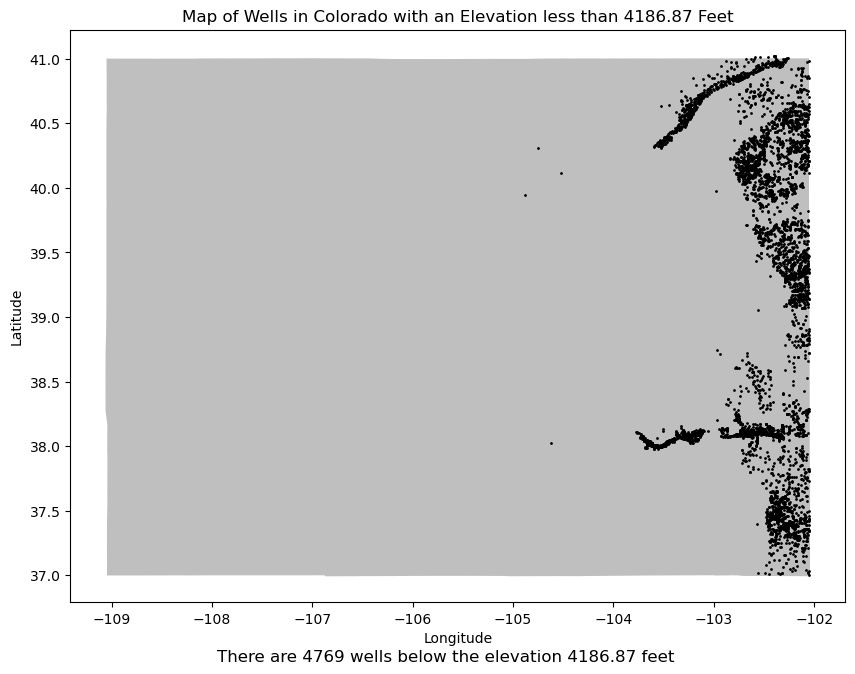

In [22]:
# Mapping wells below the 25% percentile for elevation:
gdf2 = gdf[gdf['Elevation']<4186.87]
num_wells = len(gdf2)
txt= (f'There are {num_wells} wells below the elevation 4186.87 feet')

fig, ax = plt.subplots(figsize=(10,10))
co_boundary.plot(ax=ax,color='grey', alpha = 0.5)
plt.plot(gdf2['Longitude'], gdf2['Latitude'],'o', ms=1, color='black')
plt.title(f"Map of Wells in Colorado with an Elevation less than 4186.87 Feet")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.figtext(0.5, 0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()
#plt.savefig('Wells_lowelev_all.png')


Notice the spatial distribution of wells, these maps illustrate how the high elevation wells are in the mountainous western part of Colorado and the low elevation wells are in the eastern plains of the state. 


Moving on to the next study question, we explore the distribution of well depth and water depth across the state. 

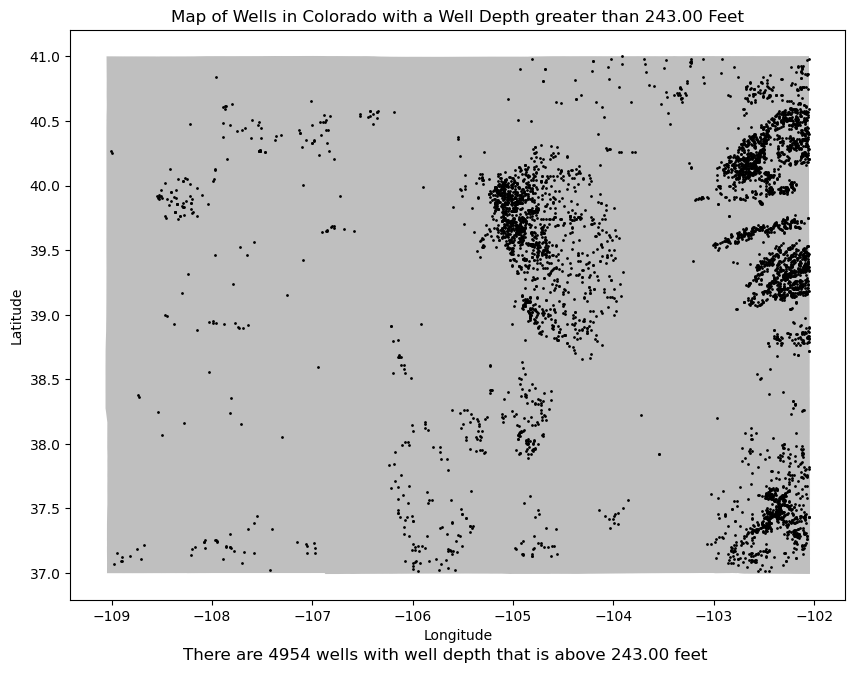

In [23]:
# Mapping well depth above the 75% percentile for elevation:
gdf3 = gdf[gdf['Well Depth']>243.00]
num_wells = len(gdf3)
txt= (f'There are {num_wells} wells with well depth that is above 243.00 feet')

fig, ax = plt.subplots(figsize=(10,10))
co_boundary.plot(ax=ax,color='grey', alpha = 0.5)
plt.plot(gdf3['Longitude'], gdf3['Latitude'],'o', ms=1, color='black')
plt.title(f"Map of Wells in Colorado with a Well Depth greater than 243.00 Feet")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.figtext(0.5, 0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)
# plt.show()
plt.savefig('wd_75_all')

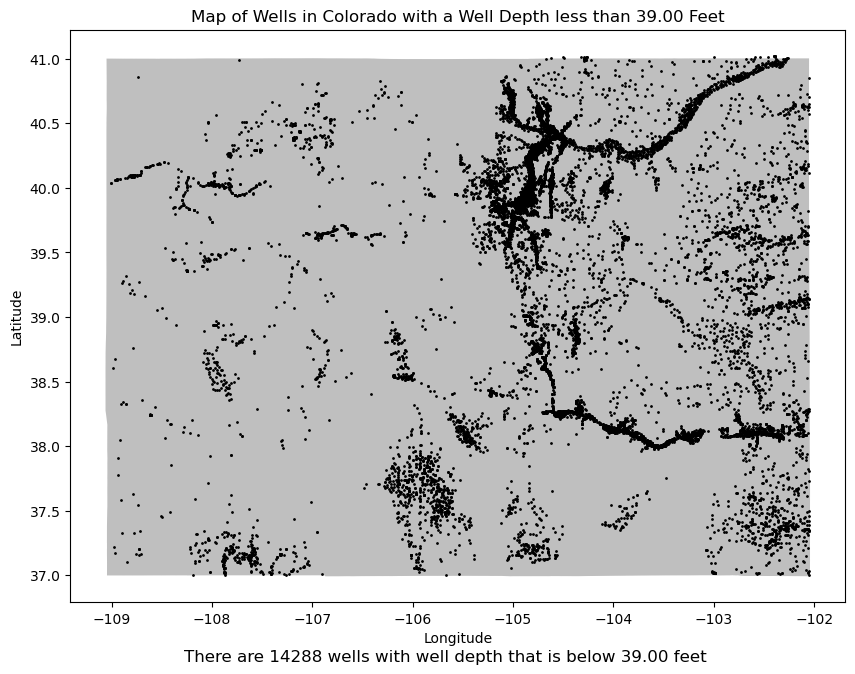

In [24]:
# Mapping well depth below the 25% percentile for elevation:
gdf4 = gdf[gdf['Well Depth']<243.00]
num_wells = len(gdf4)
txt= (f'There are {num_wells} wells with well depth that is below 39.00 feet')

fig, ax = plt.subplots(figsize=(10,10))
co_boundary.plot(ax=ax,color='grey', alpha = 0.5)
plt.plot(gdf4['Longitude'], gdf4['Latitude'],'o', ms=1, color='black')
plt.title(f"Map of Wells in Colorado with a Well Depth less than 39.00 Feet")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.figtext(0.5, 0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)
# plt.show()
plt.savefig('wd_25_all')

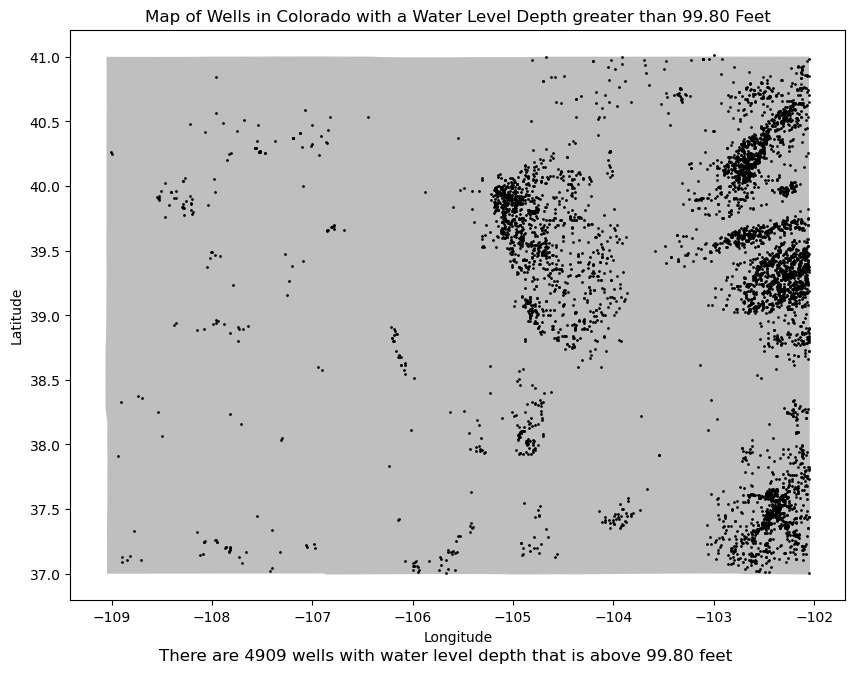

In [25]:
# Mapping water level depth above the 75% percentile for elevation:
gdf5 = gdf[gdf['Water Level Depth']>98.80]
num_wells = len(gdf5)
txt= (f'There are {num_wells} wells with water level depth that is above 99.80 feet')

fig, ax = plt.subplots(figsize=(10,10))
co_boundary.plot(ax=ax,color='grey', alpha = 0.5)
plt.plot(gdf5['Longitude'], gdf5['Latitude'],'o', ms=1, color='black')
plt.title(f"Map of Wells in Colorado with a Water Level Depth greater than 99.80 Feet")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.figtext(0.5, 0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)
# plt.show()
plt.savefig('wld_75_all')

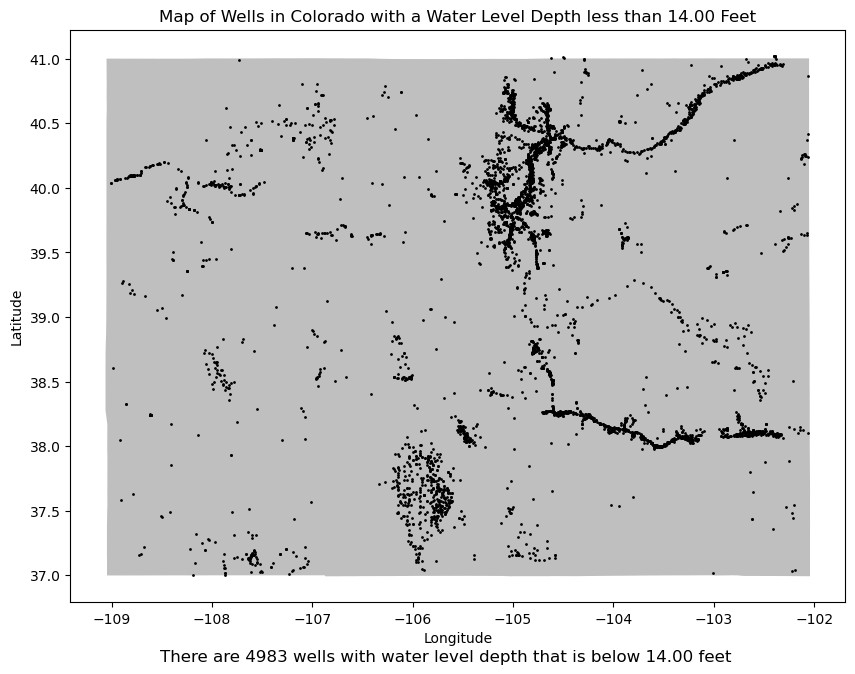

In [26]:
# Mapping water level depth below the 25% percentile for elevation:
gdf6 = gdf[gdf['Water Level Depth']<14.00]
num_wells = len(gdf6)
txt= (f'There are {num_wells} wells with water level depth that is below 14.00 feet')

fig, ax = plt.subplots(figsize=(10,10))
co_boundary.plot(ax=ax,color='grey', alpha = 0.5)
plt.plot(gdf6['Longitude'], gdf6['Latitude'],'o', ms=1, color='black')
plt.title(f"Map of Wells in Colorado with a Water Level Depth less than 14.00 Feet")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.figtext(0.5, 0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)
# plt.show()
plt.savefig('wld_25_all')

Again, these figures illustrate the interesting characteristics that describe the spatial distribution of Coloroado wells, which can speak to the water supply in the state. The ogallala aquifer, one of the largest aquifers in the world partially underlies the eastern plains of Colorado. As these maps indicate, the wells with the highest water levels as well as the deepest wells are also concentrated in this region. Conversely, in the remaining portion of the state moving west, there are more shallow wells and lower water depth. 

To support this observation that deeper wells with deeper water levels are concentrated on the eastern part of the state, while on the western part of the state, further subsets of the data can be created. 

In [27]:
# Creating new geodataframe subsets to delineate the eastern and western portions of Colorado
# Defined by the threshold where longitude < -104 is western CO, and longitude > 104 is eastern CO
gdf_west = gdf[gdf['Longitude']<-105]
gdf_east = gdf[gdf['Longitude']>-105]

By isolating the data into eastern and western portions of the state, plotting the well and water data 25th and 75th percentiles for each part can show these outliers. 

*To recap, the observation above is that wells in western Colorado will generally have lower water level and well depth, whereas wells in eastern Colorado will have higher water levels and deeper wells.*

To explore areas where this is not the case, the script below creates plots of wells in western Colorado whose well depth and water levels are above the 75th percentile, and wells in eastern Colorado whose well depth and water levels are below the 25th percentile.

**Step Five: Exploring outliers within the expected patterns of the spatial distribution of wells**

In [28]:
# Subsetting the data for water depth criteria; the 25th and 75th percentiles for western colorado
gdf_wld_h = gdf_west[gdf_west['Water Level Depth']>99.800000]
gdf_wld_l = gdf_west[gdf_west['Water Level Depth']<14.000000]
print(f'There are {len(gdf_wld_h)} wells in western CO whose water depth is above the 75th percentile')
print(f'and there are {len(gdf_wld_l)} wells in western CO whose water level depth below the 25th percentile')


There are 560 wells in western CO whose water depth is above the 75th percentile
and there are 2024 wells in western CO whose water level depth below the 25th percentile


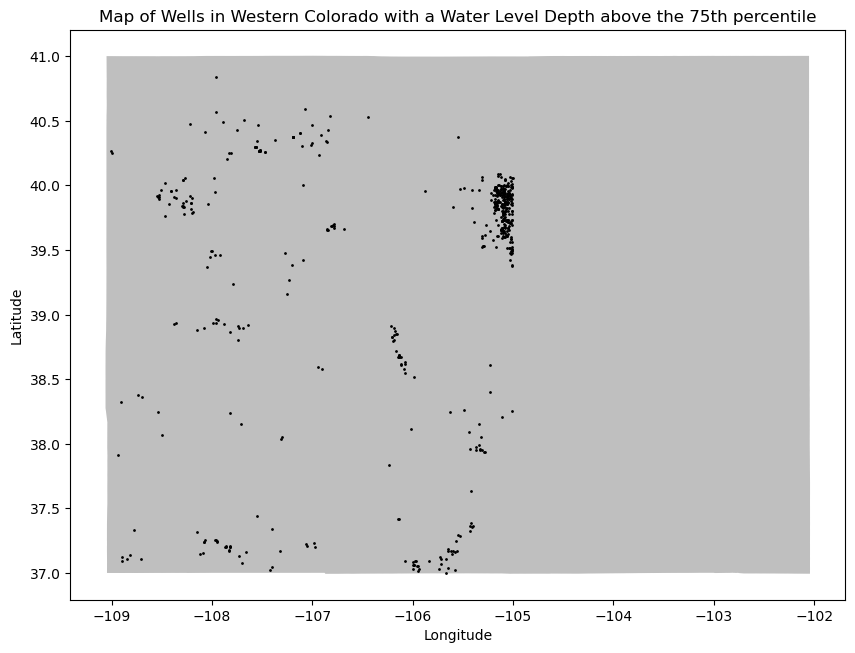

In [29]:
# Creating a plot of the 75th percentile for water level depth in western Colorado
fig, ax = plt.subplots(figsize=(10,10))
co_boundary.plot(ax=ax,color='grey', alpha = 0.5)
plt.plot(gdf_wld_h['Longitude'], gdf_wld_h['Latitude'],'o', ms=1, color='black')
plt.title(f"Map of Wells in Western Colorado with a Water Level Depth above the 75th percentile")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# plt.show()
plt.savefig('wld_75_west')

In [30]:
# Subsetting the data for well depth criteria; the 25th and 75th percentiles for western colorado
gdf_wd_h = gdf_west[gdf_west['Well Depth']>243.00]
gdf_wd_l = gdf_west[gdf_west['Well Depth']<39.00]
print(f'There are {len(gdf_wd_h)} wells in western CO whose well depth is above the 75th percentile')
print(f'and there are {len(gdf_wd_l)} wells in western CO whose well depth is below the 25th percentile')

There are 813 wells in western CO whose well depth is above the 75th percentile
and there are 1557 wells in western CO whose well depth is below the 25th percentile


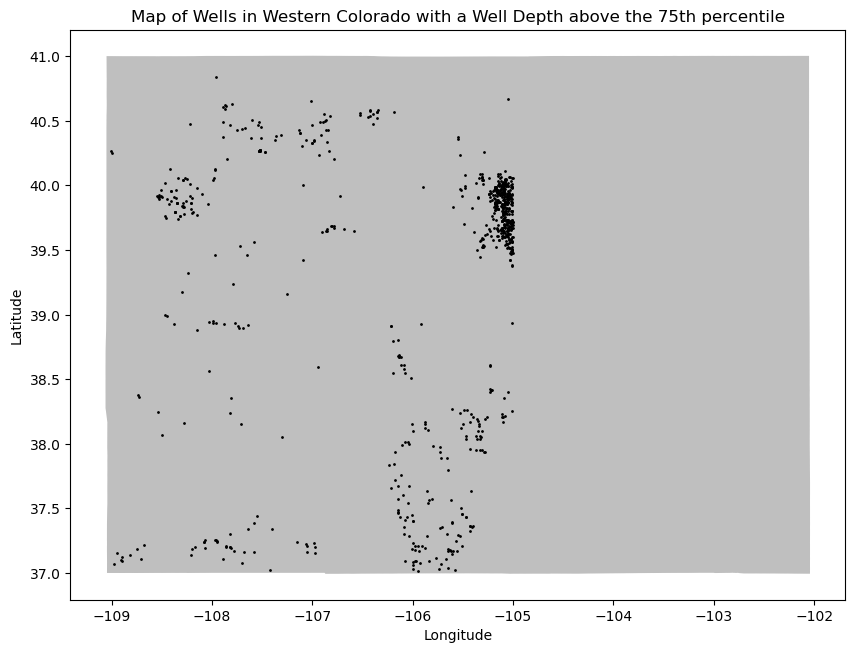

In [31]:
# Creating a plot of the 75th percentile for well depth in western Colorado
fig, ax = plt.subplots(figsize=(10,10))
co_boundary.plot(ax=ax,color='grey', alpha = 0.5)
plt.plot(gdf_wd_h['Longitude'], gdf_wd_h['Latitude'],'o', ms=1, color='black')
plt.title(f"Map of Wells in Western Colorado with a Well Depth above the 75th percentile")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# plt.show()
plt.savefig('wd_75_west')

These maps illustrate the correlation between well depth and water level depth; the deeper wells have higher water level depth while shallower wells have a lower depth. 

In [32]:
# Subsetting the data for water level depth criteria; the 25th and 75th percentiles for eastern colorado
gdf_wld_h_e = gdf_east[gdf_east['Water Level Depth']>99.800000]
gdf_wld_l_e = gdf_east[gdf_east['Water Level Depth']<14.000000]
print(f'There are {len(gdf_wld_h_e)} wells in eastern CO whose water level depth is above the 75th percentile')
print(f'and the there are {len(gdf_wld_l_e)} wells in eastern CO whose water level depth is below the 25th percentile')


There are 4318 wells in eastern CO whose water level depth is above the 75th percentile
and the there are 2958 wells in eastern CO whose water level depth is below the 25th percentile


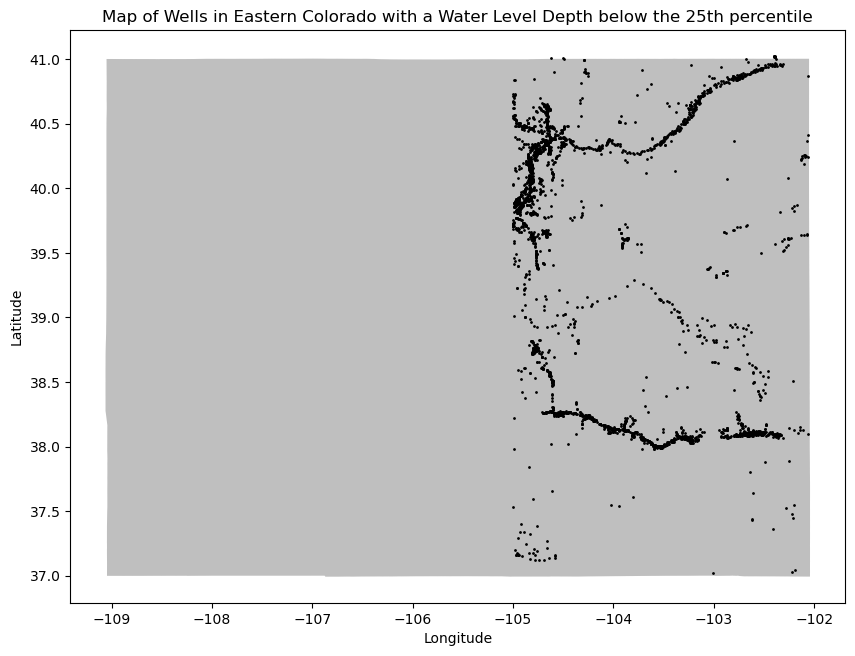

In [33]:
# Creating a plot of the 25th percentile for water level depth in eastern Colorado
fig, ax = plt.subplots(figsize=(10,10))
co_boundary.plot(ax=ax,color='grey', alpha = 0.5)
plt.plot(gdf_wld_l_e['Longitude'], gdf_wld_l_e['Latitude'],'o', ms=1, color='black')
plt.title(f"Map of Wells in Eastern Colorado with a Water Level Depth below the 25th percentile")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# plt.show()
plt.savefig('wld_25_east')

In [34]:
# Subsetting the data for well depth criteria; the 25th and 75th percentiles for eastern colorado
gdf_wd_h_e = gdf_east[gdf_east['Well Depth']>243.00]
gdf_wd_l_e = gdf_east[gdf_east['Well Depth']<39.00]
print(f'There are {len(gdf_wd_h_e)} wells in eastern CO whose well depth is above the 75th percentile')
print(f'and the there are {len(gdf_wd_l_e)} wells in eastern CO whose well depth is below the 25th percentile')

There are 4140 wells in eastern CO whose well depth is above the 75th percentile
and the there are 3281 wells in eastern CO whose well depth is below the 25th percentile


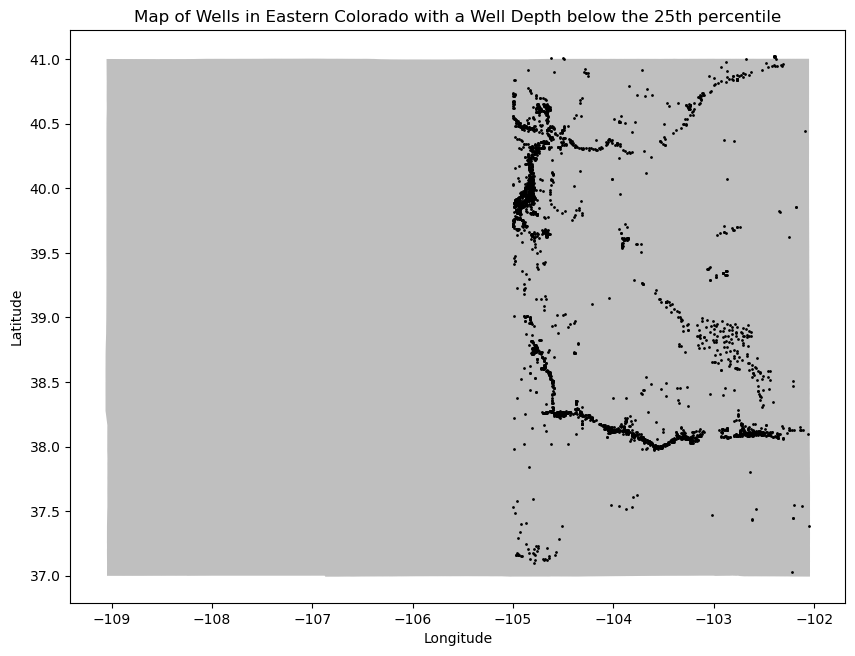

In [35]:
# Creating a plot of the 25th percentile for well depth in eastern Colorado
fig, ax = plt.subplots(figsize=(10,10))
co_boundary.plot(ax=ax,color='grey', alpha = 0.5)
plt.plot(gdf_wd_l_e['Longitude'], gdf_wd_l_e['Latitude'],'o', ms=1, color='black')
plt.title(f"Map of Wells in Eastern Colorado with a Well Depth below the 25th percentile")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# plt.show()
plt.savefig('wd_25_east')

Looking at the plotted outliers for Eastern Colorado, the results are not as interesting or surprising as those for the west; there is a more even distribution between the 25th and 75th percentile for well depth / water depth, whereas in Western Colorado, it was very obvious that there were more wells in the 25th percentile for well depth / water depth compared to the number of wells at the 75th percentile. 